In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
#Loading the csv data to a Pandas Dataframe
df =pd.read_excel('./Training_Data.xlsx')

In [5]:
#print first 5 rows in the dataframe
df.head()

,Time (sec.),Glucose Level
0,12.0,170
1,13.0,165
2,12.0,168
3,11.0,180
4,14.0,160


In [6]:
#number of rows and columns
df.shape

(117, 2)

In [7]:
#getting the statistical measures of the data
df.describe()

,Time (sec.),Glucose Level
count,117.000000,117.000000
mean,12.515385,169.333333
std,5.137583,37.882304
min,0.300000,102.000000
25%,10.000000,144.000000
50%,13.000000,165.000000
75%,16.000000,189.000000
max,22.000000,260.000000


In [8]:
correlation = df.corr()

<AxesSubplot:>

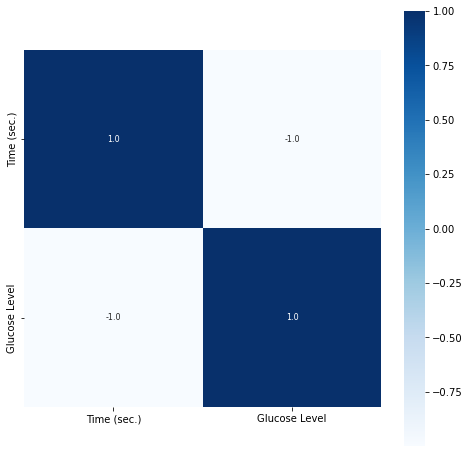

In [9]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

/Users/himon9/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose Level', ylabel='Density'>

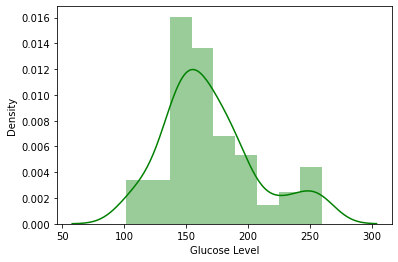

In [11]:
# check the distribution of the GLD Price
sns.distplot(df['Glucose Level'],color='green')

In [13]:
# Splitting the Features and Target
X = df.drop(['Glucose Level'],axis=1)
Y = df['Glucose Level']

In [14]:
print(X)

     Time (sec.)
0           12.0
1           13.0
2           12.0
3           11.0
4           14.0
..           ...
112         18.8
113         16.2
114         15.0
115         17.0
116          0.5

[117 rows x 1 columns]


In [15]:
print(Y)

0      170
1      165
2      168
3      180
4      160
      ... 
112    120
113    144
114    148
115    138
116    260
Name: Glucose Level, Length: 117, dtype: int64


In [16]:
# Splitting into Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [17]:
# Model Training 
# Random Forest Regressor

regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# Training the Model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [19]:
# Model Evaluation
# Prediction on Test Data

test_data_prediction = regressor.predict(X_test)

In [28]:
for y,p in zip(Y_test,test_data_prediction):
    print("\nAcutal Value : ",y)
    print("Predicted Value : ",p)
    
    if 190 <= y:
        print("Acutal Level : Severe Level")
    elif 160 <= y < 190: 
        print("Acutal Level : Medium Level")
    else:
        print("Acutal Level : Normal Level")
        
    if 190 <= p:
        print("Predicted Level: Severe Level")
    elif 160 <= p < 190: 
        print("Predicted Level: Medium Level")
    else:
        print("Predicted Level: Normal Level")
    
    


Acutal Value :  139
Predicted Value :  143.43424370074365
Acutal Level : Normal Level
Predicted Level: Normal Level

Acutal Value :  120
Predicted Value :  122.86028571428572
Acutal Level : Normal Level
Predicted Level: Normal Level

Acutal Value :  180
Predicted Value :  180.81883333333343
Acutal Level : Medium Level
Predicted Level: Medium Level

Acutal Value :  245
Predicted Value :  251.68438095238096
Acutal Level : Severe Level
Predicted Level: Severe Level

Acutal Value :  168
Predicted Value :  170.52130591630586
Acutal Level : Medium Level
Predicted Level: Medium Level

Acutal Value :  235
Predicted Value :  241.72349999999997
Acutal Level : Severe Level
Predicted Level: Severe Level

Acutal Value :  170
Predicted Value :  170.52130591630586
Acutal Level : Medium Level
Predicted Level: Medium Level

Acutal Value :  176
Predicted Value :  170.52130591630586
Acutal Level : Medium Level
Predicted Level: Medium Level

Acutal Value :  140
Predicted Value :  143.43424370074365
Acuta

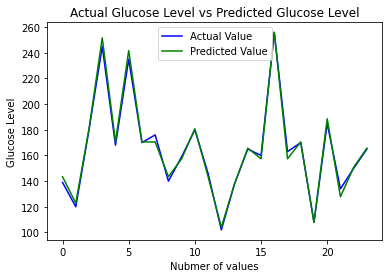

In [24]:
# Compare the Acutal Values and Predicted Values in a Plot

Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Glucose Level vs Predicted Glucose Level')
plt.xlabel('Nubmer of values')
plt.ylabel('Glucose Level')
plt.legend()
plt.show()

In [25]:
# R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.99187915228358
